In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
from itertools import permutations, product
from scipy.stats import norm

from scipy.integrate import odeint
from scipy import signal 

# Initial Values

In [2]:
path = 'Dataset'
Monte = np.load(path + '/Monte.npy')

# Loading Entropies

In [3]:
lorenz_entropies = pd.read_csv( path + '/lorenz_entropies.csv')
ARMA_entropies = pd.read_csv( path + '/ARMA_entropies.csv')
WhiteNoise_entropies = pd.read_csv( path + '/WhiteNoise_entropies.csv')
RandomWalk_entropies = pd.read_csv( path + '/RandomWalk_entropies.csv')
Chirp_entropies = pd.read_csv( path + '/Chirp_entropies.csv')
SineWave_entropies = pd.read_csv( path + '/SineWave_entropies.csv')

In [4]:
PeEn = pd.DataFrame()
PeEn['Lorenz'] = lorenz_entropies['PeEn']
PeEn['ARMA'] = ARMA_entropies['PeEn']
PeEn['WhiteNoise'] = WhiteNoise_entropies['PeEn']
PeEn['RandomWalk'] = RandomWalk_entropies['PeEn']
PeEn['Chirp'] = Chirp_entropies['PeEn']
PeEn['SineWave'] = SineWave_entropies['PeEn']

In [5]:
ApEn = pd.DataFrame()
ApEn['Lorenz'] = lorenz_entropies['ApEn']
ApEn['ARMA'] = ARMA_entropies['ApEn']
ApEn['WhiteNoise'] = WhiteNoise_entropies['ApEn']
ApEn['RandomWalk'] = RandomWalk_entropies['ApEn']
ApEn['Chirp'] = Chirp_entropies['ApEn']
ApEn['SineWave'] = SineWave_entropies['ApEn']

In [6]:
SampEn = pd.DataFrame()
SampEn['Lorenz'] = lorenz_entropies['SampEn']
SampEn['ARMA'] = ARMA_entropies['SampEn']
SampEn['WhiteNoise'] = WhiteNoise_entropies['SampEn']
SampEn['RandomWalk'] = RandomWalk_entropies['SampEn']
SampEn['Chirp'] = Chirp_entropies['SampEn']
SampEn['SineWave'] = SineWave_entropies['SampEn']

In [7]:
FuzzyEn = pd.DataFrame()
FuzzyEn['Lorenz'] = lorenz_entropies['FuzzyEn']
FuzzyEn['ARMA'] = ARMA_entropies['FuzzyEn']
FuzzyEn['WhiteNoise'] = WhiteNoise_entropies['FuzzyEn']
FuzzyEn['RandomWalk'] = RandomWalk_entropies['FuzzyEn']
FuzzyEn['Chirp'] = Chirp_entropies['FuzzyEn']
FuzzyEn['SineWave'] = SineWave_entropies['FuzzyEn']

In [8]:
DistEn = pd.DataFrame()
DistEn['Lorenz'] = lorenz_entropies['DistEn']
DistEn['ARMA'] = ARMA_entropies['DistEn']
DistEn['WhiteNoise'] = WhiteNoise_entropies['DistEn']
DistEn['RandomWalk'] = RandomWalk_entropies['DistEn']
DistEn['Chirp'] = Chirp_entropies['DistEn']
DistEn['SineWave'] = SineWave_entropies['DistEn']

In [9]:
DispEn = pd.DataFrame()
DispEn['Lorenz'] = lorenz_entropies['DispEn']
DispEn['ARMA'] = ARMA_entropies['DispEn']
DispEn['WhiteNoise'] = WhiteNoise_entropies['DispEn']
DispEn['RandomWalk'] = RandomWalk_entropies['DispEn']
DispEn['Chirp'] = Chirp_entropies['DispEn']
DispEn['SineWave'] = SineWave_entropies['DispEn']

# Boxplots

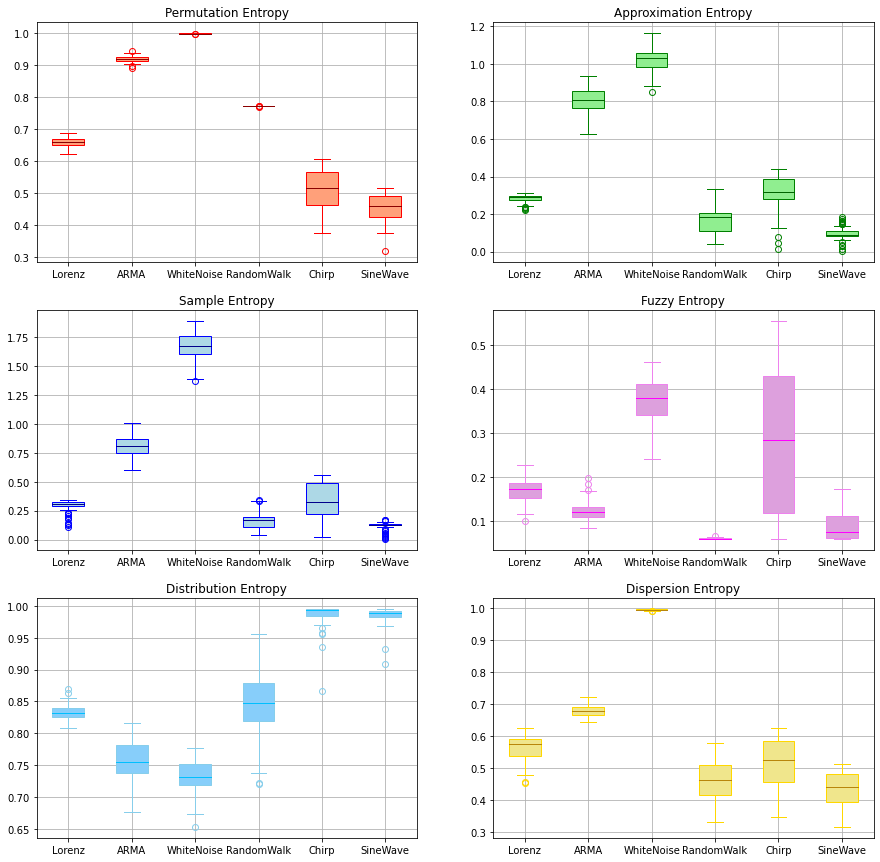

In [10]:
plt.figure(figsize = (15,15))
plt.subplot(3,2,1)
colors = ['lightsalmon', 'red', 'darkred']
plt.boxplot(PeEn, patch_artist=True,
            boxprops=dict(facecolor=colors[0], color=colors[1]),
            capprops=dict(color=colors[1]),
            whiskerprops=dict(color=colors[1]),
            flierprops=dict(color=colors[1], markeredgecolor=colors[1]),
            medianprops=dict(color=colors[2]));
plt.xticks(ticks = np.arange(1,7), labels = ['Lorenz', 'ARMA', 'WhiteNoise', 'RandomWalk',
                                            'Chirp', 'SineWave']);
plt.title('Permutation Entropy')
plt.grid()

plt.subplot(3,2,2)
colors = ['lightgreen', 'green', 'darkgreen']
plt.boxplot(ApEn, patch_artist=True,
            boxprops=dict(facecolor=colors[0], color=colors[1]),
            capprops=dict(color=colors[1]),
            whiskerprops=dict(color=colors[1]),
            flierprops=dict(color=colors[1], markeredgecolor=colors[1]),
            medianprops=dict(color=colors[2]));
plt.xticks(ticks = np.arange(1,7), labels = ['Lorenz', 'ARMA', 'WhiteNoise', 'RandomWalk',
                                            'Chirp', 'SineWave']);
plt.title('Approximation Entropy')
plt.grid()

plt.subplot(3,2,3)
colors = ['lightblue', 'blue', 'darkblue']
plt.boxplot(SampEn, patch_artist=True,
            boxprops=dict(facecolor=colors[0], color=colors[1]),
            capprops=dict(color=colors[1]),
            whiskerprops=dict(color=colors[1]),
            flierprops=dict(color=colors[1], markeredgecolor=colors[1]),
            medianprops=dict(color=colors[2]));
plt.xticks(ticks = np.arange(1,7), labels = ['Lorenz', 'ARMA', 'WhiteNoise', 'RandomWalk',
                                            'Chirp', 'SineWave']);
plt.title('Sample Entropy')
plt.grid()

plt.subplot(3,2,4)
colors = ['plum', 'violet', 'magenta']
plt.boxplot(FuzzyEn, patch_artist=True,
            boxprops=dict(facecolor=colors[0], color=colors[1]),
            capprops=dict(color=colors[1]),
            whiskerprops=dict(color=colors[1]),
            flierprops=dict(color=colors[1], markeredgecolor=colors[1]),
            medianprops=dict(color=colors[2]));
plt.xticks(ticks = np.arange(1,7), labels = ['Lorenz', 'ARMA', 'WhiteNoise', 'RandomWalk',
                                            'Chirp', 'SineWave']);
plt.title('Fuzzy Entropy')
plt.grid()

plt.subplot(3,2,5)
colors = ['lightskyblue', 'skyblue', 'deepskyblue']
plt.boxplot(DistEn, patch_artist=True,
            boxprops=dict(facecolor=colors[0], color=colors[1]),
            capprops=dict(color=colors[1]),
            whiskerprops=dict(color=colors[1]),
            flierprops=dict(color=colors[1], markeredgecolor=colors[1]),
            medianprops=dict(color=colors[2]));
plt.xticks(ticks = np.arange(1,7), labels = ['Lorenz', 'ARMA', 'WhiteNoise', 'RandomWalk',
                                            'Chirp', 'SineWave']);
plt.title('Distribution Entropy')
plt.grid()

plt.subplot(3,2,6)
colors = ['khaki', 'gold', 'darkgoldenrod']
plt.boxplot(DispEn, patch_artist=True,
            boxprops=dict(facecolor=colors[0], color=colors[1]),
            capprops=dict(color=colors[1]),
            whiskerprops=dict(color=colors[1]),
            flierprops=dict(color=colors[1], markeredgecolor=colors[1]),
            medianprops=dict(color=colors[2]));
plt.xticks(ticks = np.arange(1,7), labels = ['Lorenz', 'ARMA', 'WhiteNoise', 'RandomWalk',
                                            'Chirp', 'SineWave']);
plt.title('Dispersion Entropy')
plt.grid()